# Exemples d'application de la Methode de Monte Carlo

On souhaite utiliser la méthode Monte Carlo :
- pour obtenir une valeur approchée d'un nombre donné ($\pi$, $\sqrt2$, $e$, $\gamma$,...).
- pour obtenir une valeur approchée de l'aire d'une surface donnée.

## Approximation de $\pi$ par la méhode de Monte Carlo

Ici on commence par combiner les deux objectifs précédents puisque on tente d'approcher $\pi$

Combien de gouttes de pluie?7000
une valeur approchée de Pi est : 3.1564509215602228


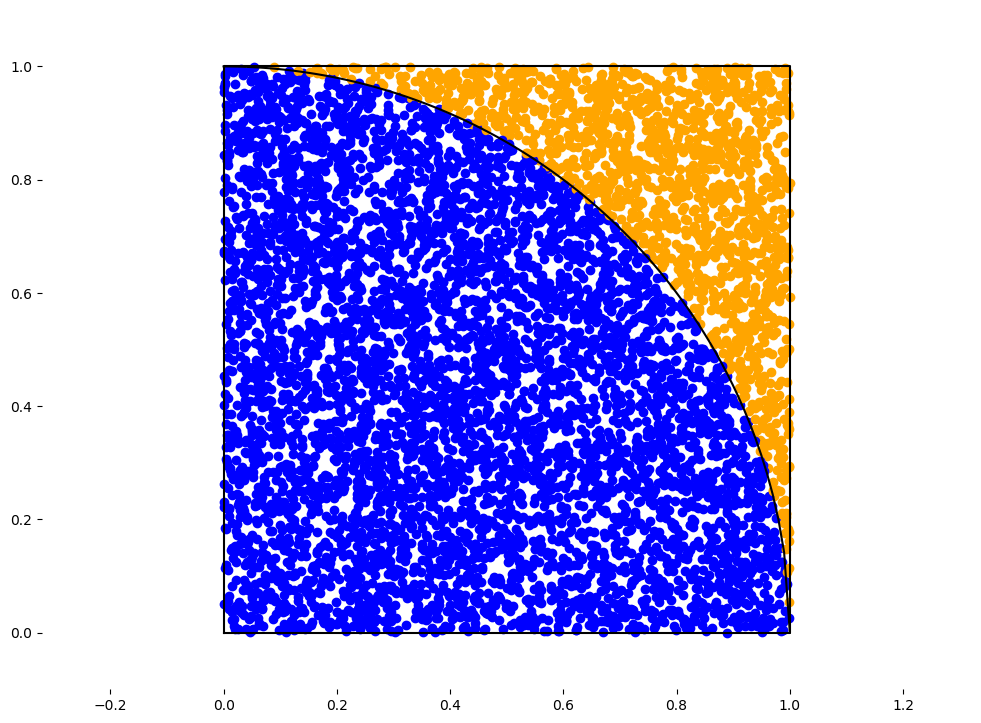

In [20]:
from math import *
from pylab import *
from random import uniform 


#définition de la fenêtre et du titre
figure(figsize=(12,9), dpi=100)
title('Approximation de Pi ar la méthonde de Monte-Carlo')

#definition des axes
axis("equal")
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none') 

#définition et tracé du quart de cerle cercle trigonométrique de rayon 1 : on a pas besoin du cercle entier!
x=linspace(0,1,100)
y=sqrt(1-x**2)
plot(x,y,'k')

#définition et tracé du quart de carré de coté 2
x = array([0,1,1,0,0])
y = array([0,0,1,1,0])
plot(x, y,'k')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

#La pluie
n=int(input('Combien de gouttes de pluie?'))
carre=0                                           # Compte le nombre de gouttes de pluie qui tombent dans le carré
cercle=0                                          # Compte le nombre de gouttes de pluie qui tombent dans le cercle
for i in range (1,n) :
    x,y = uniform(0,1), uniform(0,1)
    carremodulegouttedepluie=x**2+y**2
    modulegouttedepluie=sqrt(carremodulegouttedepluie)
    carre = carre+1
    if modulegouttedepluie<=1 : 
      cercle = cercle+1
      scatter(x,y,color='blue')
    else :
      scatter(x,y,color='orange')
    approxdepi=4*cercle/carre
    
print('une valeur approchée de Pi est :', approxdepi)     # on veut un affichage temps réel fixe dans une légende
show()

In [17]:
help(scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

In [35]:
from __future__ import division
from random import random
from math import *
from pylab import *


def rain_drop(length_of_field=1):                                                #Simulate a random rain drop
  
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]


def is_point_in_circle(point, length_of_field=1):                                #Return True if point is in inscribed circle

    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2


def plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):  #Function to draw rain drops
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    figure()
    xlim(-length_of_field / 2, length_of_field / 2)
    ylim(-length_of_field / 2, length_of_field / 2)
    scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    legend(loc="center")
    title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    savefig("%s_drops.%s" % (number_of_drops, format))


def rain(number_of_drops=1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        if dynamic:  # The dynamic option if set to True will plot every new drop (this can be used to create animations of the simulation)
            print ("Plotting drop number: %s" % (k + 1))
            plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.
    # Plot the pi estimates
    figure()
    scatter(range(1, number_of_drops + 1), pi_estimate)
    max_x = plt.xlim()[1]
    hlines(pi, 0, max_x, color='black')
    xlim(0, max_x)
    title("$\pi$ estimate against number of rain drops")
    xlabel("Number of rain drops")
    ylabel("$\pi$")
    savefig("Pi_estimate_for_%s_drops_thrown.pdf" % number_of_drops)

    if plot and not dynamic:
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of drops
        plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)

    return [number_of_drops_in_circle, number_of_drops]


if __name__ == "__main__":
    # Run the script from cli
    from sys import argv
    number_of_drops = 100
    if len(argv) > 1:  # If an argument is passed then change number of drops to be simulated.
        number_of_drops = eval(argv[1])
    #  Two sets of simulations (comment out the unwanted one).
    #r = rain(number_of_drops, plot=True, format='png', dynamic=True)
    r = rain(number_of_drops, plot=True, format='png', dynamic=False)
    # Print to screen:
    print ("----------------------")
    print ("%s drops" % number_of_drops)
    print ("pi estimated as:")
    print ("\t%s" % (4 * r[0] / r[1]))
    print ("----------------------")

TypeError: bad operand type for unary -: 'builtin_function_or_method'